# Titanic 생존 예측

## KNN 분류

## Logistic 회귀

## 결정트리 분류

`One-Hot Encoding`: 문자열 데이터 범주화(숫자는 크기가 영향을 줌)
- 장점: 숫자 크기에 영향을 받지 않는 온전한 분류
- 단점: 카테고리 너무 커져서 차원이 너무 많아짐(과적합 위험성)

`MICE`: 회귀모델로 결측치 채우기


In [ ]:
# # One-Hot Encoder

# from sklearn.preprocessing import OneHotEncoder
# encoder = OneHotEncoder(sparse_output=False, drop=None)
# df = pd.DataFrame(encoder.fit_transform(df[['sex', 'embarked']]), colums=df.columns)
# # 이거 아니면
# df = pd.get_dummies(df, columns=['sex', 'embarked'])

# # MICE

# df_imputed = pd.DataFrame(imputer.fit_transform(df), colums=df.colums)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.family'] = 'Pretendard'

import warnings
warnings.filterwarnings('ignore')

titanic = sns.load_dataset('titanic')
titanic.isna().sum() # age: 177
# len(titanic) # 891
# pclass, sex 별 평균 age로 결측치 채우기
titanic['age'] = titanic['age'].fillna(
    titanic.groupby(['pclass', 'sex'])['age'].transform('mean')
    
) # 강의에서는 MICE 활용
# man=0, woman=1, child=결측치(또는 2 등으로 별도 처리)
titanic['sex'] = titanic['sex'].map({'male': 0, 'female': 1})


In [2]:
titanic.head()


X = titanic[['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'alone']]
y = titanic['survived']
X_train, X_test, y_train, y_test = train_test_split(X, y)
print(X_train.shape)
print(X_test.shape)

X_train

# 임시 데이터(나를 표본으로) 만들기
me = pd.DataFrame([{
    'pclass': 2, 'sex': 0, 'age': 28, 'sibsp': 0, 'parch': 0, 'fare': 50, 'alone': True
    }])

data = [
    {
        # 'name': '이재명 대통령',
        'pclass': 1,         # 고위직 → 1등석 가정
        'sex': 0,
        'age': 60,           # 1964년생 기준
        'sibsp': 0,
        'parch': 0,
        'fare': 100.0,       # 고수입 이미지
        'alone': True
        # 'embarked': 'C'
    },
    {
        # 'name': '아이돌 장원영',
        'pclass': 1,         # 인기 아이돌 → 1등석
        'sex': 1,
        'age': 20,           # 2004년생 기준
        'sibsp': 0,
        'parch': 0,
        'fare': 80.0,        # 고액 요금
        'alone': True
        # 'embarked': 'S'
    },
    {
        # 'name': '래퍼 슬리피',
        'pclass': 3,         # 가난하다고 가정
        'sex': 0,
        'age': 40,           # 1984년생 기준
        'sibsp': 0,
        'parch': 0,
        'fare': 5.0,        # 가난하다고 가정
        'alone': True
        # 'embarked': 'Q'
    },
    {
        # 'name': '배우 윤여정',
        'pclass': 2,         # 재산 환원했다고 가정
        'sex': 1,
        'age': 77,           # 1947년생 기준
        'sibsp': 0,
        'parch': 0,
        'fare': 5.0,        # 재산 환원했다고 가정
        'alone': True
    }
]

df_celeb = pd.DataFrame(data)

df_celeb


(668, 7)
(223, 7)


,pclass,sex,age,sibsp,parch,fare,alone
0,1,0,60,0,0,100.0,True
1,1,1,20,0,0,80.0,True
2,3,0,40,0,0,5.0,True
3,2,1,77,0,0,5.0,True


In [3]:
# 정규화
ss = StandardScaler()
X_train_s = ss.fit_transform(X_train)
X_test_s = ss.transform(X_test)

celeb_s = ss.transform(df_celeb)

In [ ]:
# KNN
test_scores = []
for n in range(1, 20):
    kn = KNeighborsClassifier(n)
    kn.fit(X_train_s, y_train)
    # print(n, kn.score(X_test_s, y_test))
    test_scores.append(kn.score(X_test_s, y_test))

max_n = test_scores.index(max(test_scores))

kn = KNeighborsClassifier(max_n)
kn.fit(X_train_s, y_train)
print(max_n, kn.score(X_test_s, y_test))
kn.predict_proba(celeb_s)
# """
# 이재명 장원영 슬리피 윤여정
# array([[0.91666667, 0.08333333],
#        [0.        , 1.        ],
#        [0.91666667, 0.08333333],
#        [0.58333333, 0.41666667]])
# """

12 0.8026905829596412


array([[0.91666667, 0.08333333],
       [0.        , 1.        ],
       [0.91666667, 0.08333333],
       [0.58333333, 0.41666667]])

In [9]:
# LogisticRegression
clist = []
for c in range(1, 20):
    lr = LogisticRegression(C=c)
    lr.fit(X_train_s, y_train)
    score = lr.score(X_test_s, y_test)
    # print(f'{c} score: ', score)
    clist.append(c)

max_c = clist.index(max(clist))

max_c

lr = LogisticRegression(C=max_c)
lr.fit(X_train_s, y_train)
score = lr.score(X_test_s, y_test)
print(f'{c} score: ', score)
lr.predict_proba(celeb_s)

19 score:  0.7847533632286996


array([[0.83583923, 0.16416077],
       [0.03651543, 0.96348457],
       [0.96259309, 0.03740691],
       [0.76092782, 0.23907218]])

array([[0.65384615, 0.34615385],
       [0.        , 1.        ],
       [0.93461538, 0.06538462],
       [1.        , 0.        ]])

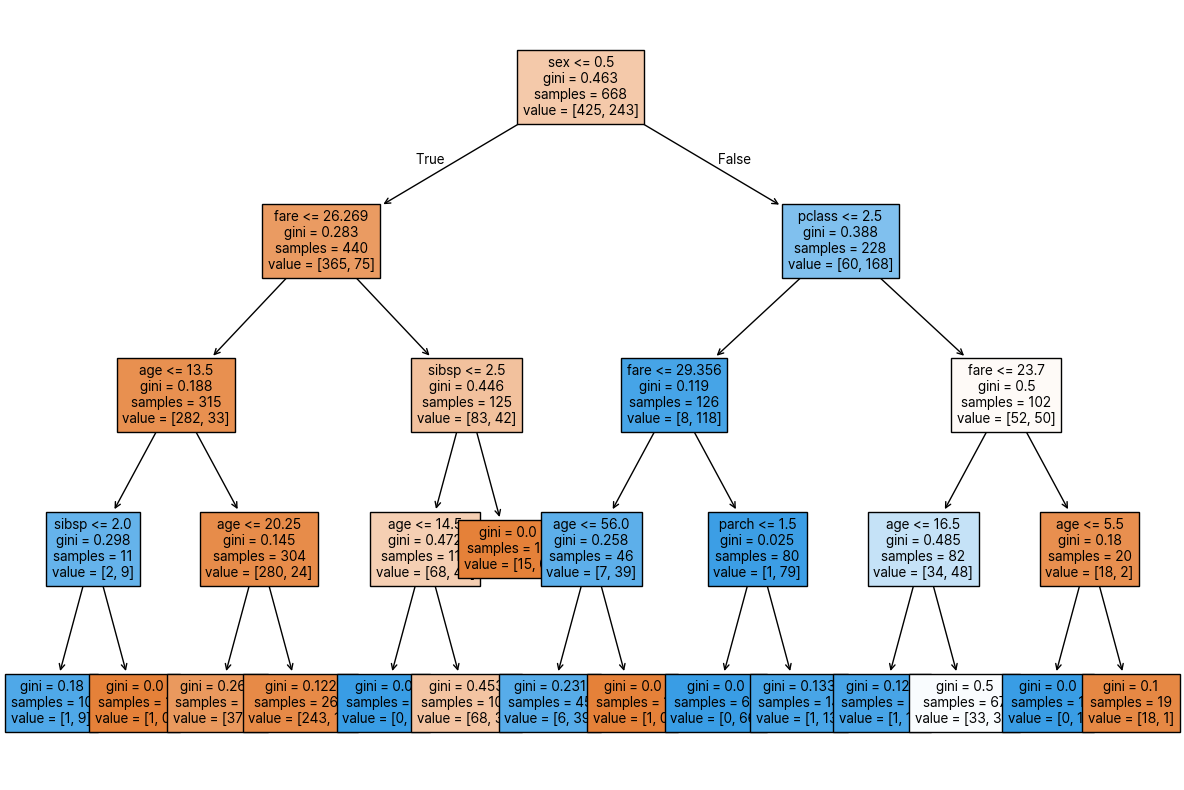

In [11]:



dt = DecisionTreeClassifier(max_depth=4)
dt.fit(X_train, y_train)
dt.score(X_test, y_test)
plt.figure(figsize=(15, 10))
plot_tree(dt, max_depth=4, filled=True, fontsize=10, feature_names=['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'alone'])
dt.predict_proba(df_celeb)


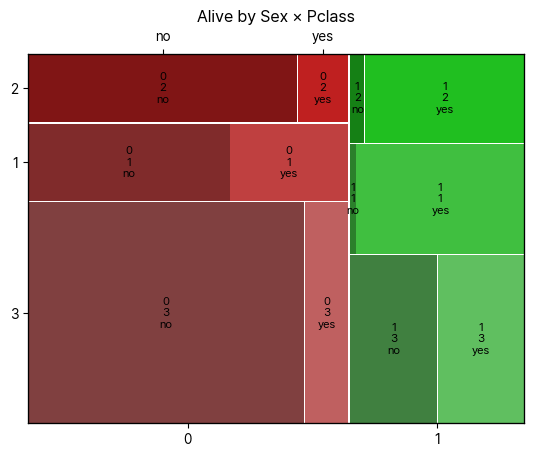

ValueError: at least one proportion should be greater than zerogiven value: [0. 0.]

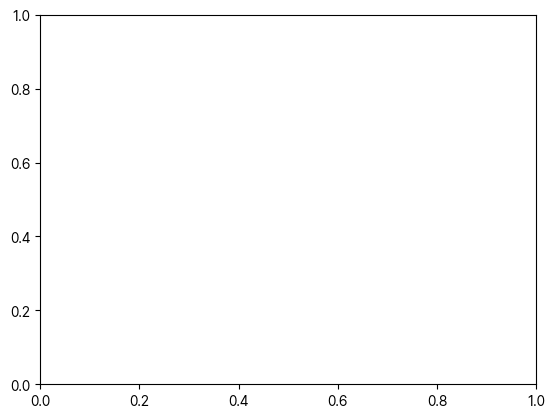

In [ ]:

from statsmodels.graphics.mosaicplot import mosaic

# 기본: 성별×등급에 따른 생존
df = titanic.dropna(subset=['sex','pclass','alive'])
mosaic(df, ['sex','pclass','alive'], title='Alive by Sex × Pclass')
plt.show()

# 트리 조건 반영: 요금·부모동반 이진화 후 모자이크
df = titanic.copy()
df['fare_bin']  = pd.cut(df['fare'],  bins=[-1, 28.856, df['fare'].max()], labels=['<=28.856','>28.856'])
df['parch_bin'] = pd.cut(df['parch'], bins=[-1, 1.5,   df['parch'].max()], labels=['<=1.5','>1.5'])

df2 = df.dropna(subset=['sex','pclass','fare_bin','parch_bin','alive'])
mosaic(df2, ['sex','pclass','fare_bin','parch_bin','alive'],
       title='Alive by Sex × Pclass × Fare_bin × Parch_bin')
plt.show()